In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
from utils import ProgBar
pd.set_option('display.max_columns', None)

## Tempo até o óbito em fila

In [7]:
arquivo = "Base de Dados_Doação e Transplantes_2015-2023.xlsx"

In [8]:
# Reading spread-sheet

header_row = 4

df_inscricao = pd.read_excel(
    arquivo,
    sheet_name=0,
    header=header_row,
)

df_inscricao.head()

n_amostras = len(df_inscricao)

In [9]:
# Reading spread-sheet

header_row = 5

df_obitos = pd.read_excel(
    arquivo,
    sheet_name=4,
    header=header_row,
)
df_obitos.head()

,UF,Região,ID,Data de Nascimento,Sexo,Grupo Sanguíneo,Cor,Ano,Mês,Data do Óbito,Enxerto,Equipe,Estabelecimento,Cidade Estabelecimento,Evento
0,SP,Sudeste,154965SP,14137,F,O,Branca,2015,Janeiro,2015-01-01,RI,H. São Paulo - EPM - Medina (Rim),Hospital São Paulo da Escola Paulista de Medicina,São Paulo,Óbito Pré Transplantes
1,SP,Sudeste,171096SP,23173,F,O,Branca,2015,Janeiro,2015-01-01,RI,HCFMUSP - Rim,Hospital das Clínicas de São Paulo,São Paulo,Óbito Pré Transplantes
2,SP,Sudeste,185118SP,36270,F,B,Negra,2015,Janeiro,2015-01-01,FI,Sírio Libanês - Eduardo Antunes Fonseca,Hospital Sírio Libanês,São Paulo,Óbito Pré Transplantes
3,SP,Sudeste,179520SP,33331,M,A,Branca,2015,Janeiro,2015-01-02,FI,Hospital E.J.Zerbini - Adriano Miziara Gonzalez,Hospital Dr. Euryclides de Jesus Zerbini - Bri...,São Paulo,Óbito Pré Transplantes
4,SP,Sudeste,184177SP,20725,M,O,Branca,2015,Janeiro,2015-01-02,CO,HC - Coração adulto,Hospital das Clínicas de São Paulo,São Paulo,Óbito Pré Transplantes


In [10]:
df_result=df_inscricao.set_index('ID').join(df_obitos.set_index('ID'), on=['ID'], lsuffix="_insc", rsuffix="_obt")
df_result.head()

,UF_insc,Região_insc,Ano_insc,Mês_insc,Data da Inscrição,Enxerto_insc,Data de Nascimento_insc,Sexo_insc,Grupo Sanguíneo_insc,Cor_insc,UF origem,Equipe_insc,Estabelecimento_insc,Cidade Estabelecimento_insc,UF_obt,Região_obt,Data de Nascimento_obt,Sexo_obt,Grupo Sanguíneo_obt,Cor_obt,Ano_obt,Mês_obt,Data do Óbito,Enxerto_obt,Equipe_obt,Estabelecimento_obt,Cidade Estabelecimento_obt,Evento
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
188975SP,SP,Sudeste,2015,Janeiro,2015-01-01,CO,1967-09-06,M,O,Negra,SP,Sírio Libanês - Silvia Moreira Ayub Ferreira,Hospital Sírio Libanês,São Paulo,SP,Sudeste,24721.0,M,O,Negra,2015.0,Março,2015-03-13,CO,Sírio Libanês - Silvia Moreira Ayub Ferreira,Hospital Sírio Libanês,São Paulo,Óbito Pré Transplantes
124895PE,PE,Nordeste,2015,Janeiro,2015-01-02,FI,1954-04-16,M,O,Parda,PE,PE - IMIP - Cláudio Moura Lacerda de Lima,IMIP,RECIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
124877PB,PB,Nordeste,2015,Janeiro,2015-01-02,RI,1974-09-25,M,O,Parda,PB,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
124880PB,PB,Nordeste,2015,Janeiro,2015-01-02,RI,1965-11-27,M,A,Parda,PB,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
124872PB,PB,Nordeste,2015,Janeiro,2015-01-02,RI,1962-12-16,M,O,Parda,PB,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [11]:
df_result_pre_pro = df_result.dropna(subset=['Data do Óbito'])

In [12]:
delta_t = (df_result_pre_pro["Data do Óbito"].values - df_result_pre_pro["Data da Inscrição"].values)/np.timedelta64(1, 'D')/30

In [13]:
delta_t_negativo = delta_t[delta_t<0]
delta_t_positivo = delta_t[delta_t>=0]

print("amostras negativas: ", len(delta_t_negativo))
print("amostras positivas: ", len(delta_t_positivo))

amostras negativas:  28
amostras positivas:  16440


In [14]:
unique_delta, count = np.unique(delta_t_positivo, return_counts=True)

percentage = []
acumulada = 100

for delta, n_vezes in zip(unique_delta, count):
    acumulada -= (n_vezes/n_amostras)*100
    percentage.append(acumulada)

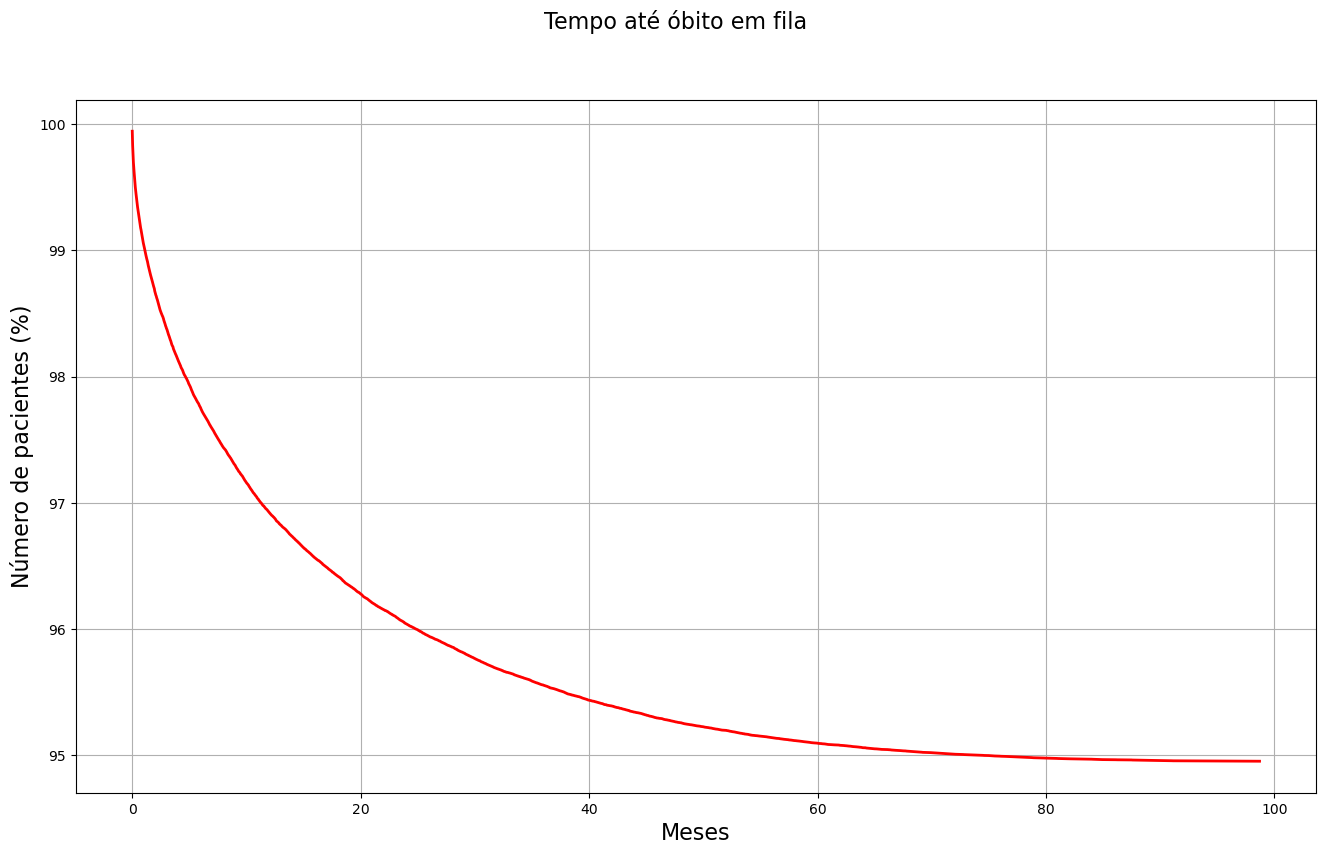

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Tempo até óbito em fila', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1,1)

ax.set_ylabel('Número de pacientes (%)', fontsize=16)
ax.set_xlabel('Meses', fontsize=16)

ax.plot(unique_delta, percentage, 'r', linewidth=2)

ax.grid()

plt.show()

## Tempo de seguimento

In [16]:
# Reading spread-sheet

header_row = 4

df_tranplantes = pd.read_excel(
    arquivo,
    sheet_name=2,
    header=header_row,
)
df_tranplantes.head()

,Ano do Transplante,Mês do Transplante,Enxerto,UF,Região,Data da Inscrição,Data do Transplante,Tipo de Doador,UF de Origem,ID,Data de Nascimento,Sexo,Grupo Sanguíneo,Cor,Equipe,Estabelecimento,Cidade Estabelecimento
0,2015,Janeiro,FI,CE,Nordeste,2014-12-04,2015-01-01,Doador Falecido,CE,123647CE,1983-02-06,F,A,Parda,CE - HUWC - José Huygens Parente Garcia,HOSPITAL UNIVERSITARIO WALTER CANTIDIO - HUWC,FORTALEZA
1,2015,Janeiro,FI,PE,Nordeste,2014-12-30,2015-01-01,Doador Falecido,PE,124865PE,1954-01-14,M,O,Parda,PE - HUOC - Cláudio Moura Lacerda,HOSPITAL UNIVERSITÁRIO OSWALDO CRUZ,RECIFE
2,2015,Janeiro,RI,PE,Nordeste,2014-09-26,2015-01-01,Doador Falecido,PE,118654PE,1999-05-18,F,A,Parda,PE - IMIP - Luis Gonzaga de Negreiros Filho,IMIP,RECIFE
3,2015,Janeiro,RI,RS,Sul,2013-05-02,2015-01-01,Doador Falecido,RS,85775RS,1949-03-01,F,B,Branca,RS - ISCMPA - Valter Duro Garcia,IRMANDADE SANTA CASA DE MISERICÓRDIA DE PORTO ...,PORTO ALEGRE
4,2015,Janeiro,RI,RS,Sul,2013-11-22,2015-01-01,Doador Falecido,RS,99196RS,1950-09-29,M,B,Branca,RS - AHCI - Maria Leocádia Amaral Padilha,ASSOCIAÇÃO HOSPITAL DE CARIDADE DE IJUÍ,IJUI


In [17]:
dfs = [df_inscricao,df_obitos,df_tranplantes]

In [18]:
from functools import reduce

final_df = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                            how='outer'), dfs)


In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344410 entries, 0 to 344409
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UF_x                      325667 non-null  object        
 1   Região_x                  325667 non-null  object        
 2   ID                        344410 non-null  object        
 3   Ano_x                     325667 non-null  float64       
 4   Mês_x                     325667 non-null  object        
 5   Data da Inscrição_x       325667 non-null  datetime64[ns]
 6   Enxerto_x                 325667 non-null  object        
 7   Data de Nascimento_x      325667 non-null  datetime64[ns]
 8   Sexo_x                    325667 non-null  object        
 9   Grupo Sanguíneo_x         145159 non-null  object        
 10  Cor_x                     325667 non-null  object        
 11  UF origem                 325667 non-null  object        
 12  Eq

In [20]:
final_df.head()

,UF_x,Região_x,ID,Ano_x,Mês_x,Data da Inscrição_x,Enxerto_x,Data de Nascimento_x,Sexo_x,Grupo Sanguíneo_x,Cor_x,UF origem,Equipe_x,Estabelecimento_x,Cidade Estabelecimento_x,UF_y,Região_y,Data de Nascimento_y,Sexo_y,Grupo Sanguíneo_y,Cor_y,Ano_y,Mês_y,Data do Óbito,Enxerto_y,Equipe_y,Estabelecimento_y,Cidade Estabelecimento_y,Evento,Ano do Transplante,Mês do Transplante,Enxerto,UF,Região,Data da Inscrição_y,Data do Transplante,Tipo de Doador,UF de Origem,Data de Nascimento,Sexo,Grupo Sanguíneo,Cor,Equipe,Estabelecimento,Cidade Estabelecimento
0,SP,Sudeste,188975SP,2015.0,Janeiro,2015-01-01,CO,1967-09-06,M,O,Negra,SP,Sírio Libanês - Silvia Moreira Ayub Ferreira,Hospital Sírio Libanês,São Paulo,SP,Sudeste,24721.0,M,O,Negra,2015.0,Março,2015-03-13,CO,Sírio Libanês - Silvia Moreira Ayub Ferreira,Hospital Sírio Libanês,São Paulo,Óbito Pré Transplantes,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,PE,Nordeste,124895PE,2015.0,Janeiro,2015-01-02,FI,1954-04-16,M,O,Parda,PE,PE - IMIP - Cláudio Moura Lacerda de Lima,IMIP,RECIFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,PB,Nordeste,124877PB,2015.0,Janeiro,2015-01-02,RI,1974-09-25,M,O,Parda,PB,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017.0,Janeiro,RI,PB,Nordeste,2015-01-02,2017-01-29,Doador Falecido,PB,1974-09-25,M,O,Parda,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE
3,PB,Nordeste,124880PB,2015.0,Janeiro,2015-01-02,RI,1965-11-27,M,A,Parda,PB,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2016.0,Dezembro,RI,PB,Nordeste,2015-01-02,2016-12-09,Doador Falecido,PB,1965-11-27,M,A,Parda,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE
4,PB,Nordeste,124872PB,2015.0,Janeiro,2015-01-02,RI,1962-12-16,M,O,Parda,PB,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
final_df.columns

Index(['UF_x', 'Região_x', 'ID', 'Ano_x', 'Mês_x', 'Data da Inscrição_x',
       'Enxerto_x', 'Data de Nascimento_x', 'Sexo_x', 'Grupo Sanguíneo_x',
       'Cor_x', 'UF origem', 'Equipe_x', ' Estabelecimento_x',
       'Cidade Estabelecimento_x', 'UF_y', 'Região_y', 'Data de Nascimento_y',
       'Sexo_y', 'Grupo Sanguíneo_y', 'Cor_y', 'Ano_y', 'Mês_y',
       'Data do Óbito', 'Enxerto_y', 'Equipe_y', ' Estabelecimento_y',
       'Cidade Estabelecimento_y', 'Evento', ' Ano do Transplante',
       ' Mês do Transplante', 'Enxerto', 'UF', 'Região', 'Data da Inscrição_y',
       'Data do Transplante', 'Tipo de Doador', 'UF de Origem',
       'Data de Nascimento', 'Sexo', 'Grupo Sanguíneo', 'Cor', 'Equipe',
       'Estabelecimento', 'Cidade Estabelecimento'],
      dtype='object')

In [41]:
# retirando colunas duplicadas

filtred_df = final_df[
       [ "ID",
        "Data da Inscrição_x",
        "UF origem",
        "Data do Óbito",
        "Enxerto_x",
        "UF_x",
        "Região_x",
        "Data do Transplante",
        "Tipo de Doador",
        "UF de Origem",
        "Data de Nascimento_x",
        "Sexo_x",
        "Grupo Sanguíneo_x",
        "Cor_x",]
    ]

In [42]:
filtred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344410 entries, 0 to 344409
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    344410 non-null  object        
 1   Data da Inscrição_x   325667 non-null  datetime64[ns]
 2   UF origem             325667 non-null  object        
 3   Data do Óbito         20225 non-null   datetime64[ns]
 4   Enxerto_x             325667 non-null  object        
 5   UF_x                  325667 non-null  object        
 6   Região_x              325667 non-null  object        
 7   Data do Transplante   185772 non-null  datetime64[ns]
 8   Tipo de Doador        185772 non-null  object        
 9   UF de Origem          185772 non-null  object        
 10  Data de Nascimento_x  325667 non-null  datetime64[ns]
 11  Sexo_x                325667 non-null  object        
 12  Grupo Sanguíneo_x     145159 non-null  object        
 13 

In [38]:
# renomeando colunas 

filtred_df = filtred_df.rename(
    columns={
        "Data da Inscrição_x":"data_da_inscricao",
        "UF_x":"uf",
        "Data do Óbito":"data_do_obito",
        "Enxerto_x":"enxerto",
        "Região_x":"regiao",
        "Data do Transplante":"data_do_transplante",
        "Tipo de Doador":"tipo_do_doador",
        "UF de Origem":"uf_de_origem",
        "Data de Nascimento_x":"data_de_nascimento",
        "Sexo_x":"sexo",
        "Grupo Sanguíneo_x":"grupo_sanguineo",
        "Cor_x":"cor",
    }
)

In [39]:
# retirando data de inscrição null

filtred_df = filtred_df.dropna(
    subset=["data_da_inscricao"]
)

In [40]:
filtred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325667 entries, 0 to 325666
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   325667 non-null  object        
 1   data_da_inscricao    325667 non-null  datetime64[ns]
 2   UF origem            325667 non-null  object        
 3   data_do_obito        16468 non-null   datetime64[ns]
 4   enxerto              325667 non-null  object        
 5   uf                   325667 non-null  object        
 6   regiao               325667 non-null  object        
 7   data_do_transplante  170786 non-null  datetime64[ns]
 8   tipo_do_doador       170786 non-null  object        
 9   uf_de_origem         170786 non-null  object        
 10  data_de_nascimento   325667 non-null  datetime64[ns]
 11  sexo                 325667 non-null  object        
 12  grupo_sanguineo      145159 non-null  object        
 13  cor                

In [26]:
# retirando pacientes ainda em fila

filtred_df = filtred_df.dropna(
    subset=["data_do_obito", "data_do_transplante"], how="all"
)

In [27]:
filtred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187253 entries, 0 to 325508
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   187253 non-null  object        
 1   data_da_inscricao    187253 non-null  datetime64[ns]
 2   UF origem            187253 non-null  object        
 3   data_do_obito        16468 non-null   datetime64[ns]
 4   enxerto              187253 non-null  object        
 5   uf                   187253 non-null  object        
 6   regiao               187253 non-null  object        
 7   data_do_transplante  170786 non-null  datetime64[ns]
 8   tipo_do_doador       170786 non-null  object        
 9   uf_de_origem         170786 non-null  object        
 10  data_de_nascimento   187253 non-null  datetime64[ns]
 11  sexo                 187253 non-null  object        
 12  grupo_sanguineo      76031 non-null   object        
 13  cor                

In [28]:
# criando coluna única de tempo, 
# colunas binárias de tipo e tempo de segmento

tmp_dict = {"data_do_evento": [], "obito_bin": [], "transplante_bin": [], "delta_t": []}

bar = ProgBar(len(filtred_df), "Formatando dados...")

for i in range(len(filtred_df)):

    # Transplantou
    if np.isnan(filtred_df["data_do_obito"].values[i]):
        
        tmp_dict["data_do_evento"].append(filtred_df["data_do_transplante"].values[i])
        tmp_dict["delta_t"].append(
            (
                filtred_df["data_do_transplante"].values[i]
                - filtred_df["data_da_inscricao"].values[i]
            )
            / np.timedelta64(1, "D")
        )
        tmp_dict["obito_bin"].append(0)
        tmp_dict["transplante_bin"].append(1)


    # veio a óbito
    else:
        tmp_dict["data_do_evento"].append(filtred_df["data_do_obito"].values[i])
        tmp_dict["delta_t"].append(
            (
                filtred_df["data_do_obito"].values[i]
                - filtred_df["data_da_inscricao"].values[i]
            )
            / np.timedelta64(1, "D")
        )
        tmp_dict["obito_bin"].append(1)
        tmp_dict["transplante_bin"].append(0)

    bar.update()

Formatando dados...
[--------------------------------------------------] 100.00% - 187253 of 187253

In [29]:
# unindo colunas calculadas 

formated_df = pd.concat([filtred_df,pd.DataFrame(tmp_dict)],ignore_index=True)

In [30]:
# retirando colunas despadronizadas

formated_df = formated_df.drop(columns=["data_do_obito","data_do_transplante"])


In [31]:
formated_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374506 entries, 0 to 374505
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  187253 non-null  object        
 1   data_da_inscricao   187253 non-null  datetime64[ns]
 2   UF origem           187253 non-null  object        
 3   enxerto             187253 non-null  object        
 4   uf                  187253 non-null  object        
 5   regiao              187253 non-null  object        
 6   tipo_do_doador      170786 non-null  object        
 7   uf_de_origem        170786 non-null  object        
 8   data_de_nascimento  187253 non-null  datetime64[ns]
 9   sexo                187253 non-null  object        
 10  grupo_sanguineo     76031 non-null   object        
 11  cor                 187253 non-null  object        
 12  data_do_evento      187253 non-null  datetime64[ns]
 13  obito_bin           187253 no

In [32]:
seg_delta_t_negativo = formated_df.delta_t[formated_df.delta_t<0]
seg_delta_t_positivo = formated_df.delta_t[formated_df.delta_t>=0]

print("amostras negativas: ", len(seg_delta_t_negativo))
print("amostras positivas: ", len(seg_delta_t_positivo))

amostras negativas:  272
amostras positivas:  186981


In [33]:
unique_delta, count = np.unique(seg_delta_t_positivo, return_counts=True)

percentage = []
acumulada = 100

for delta, n_vezes in zip(unique_delta, count):
    acumulada -= (n_vezes/n_amostras)*100
    percentage.append(acumulada)

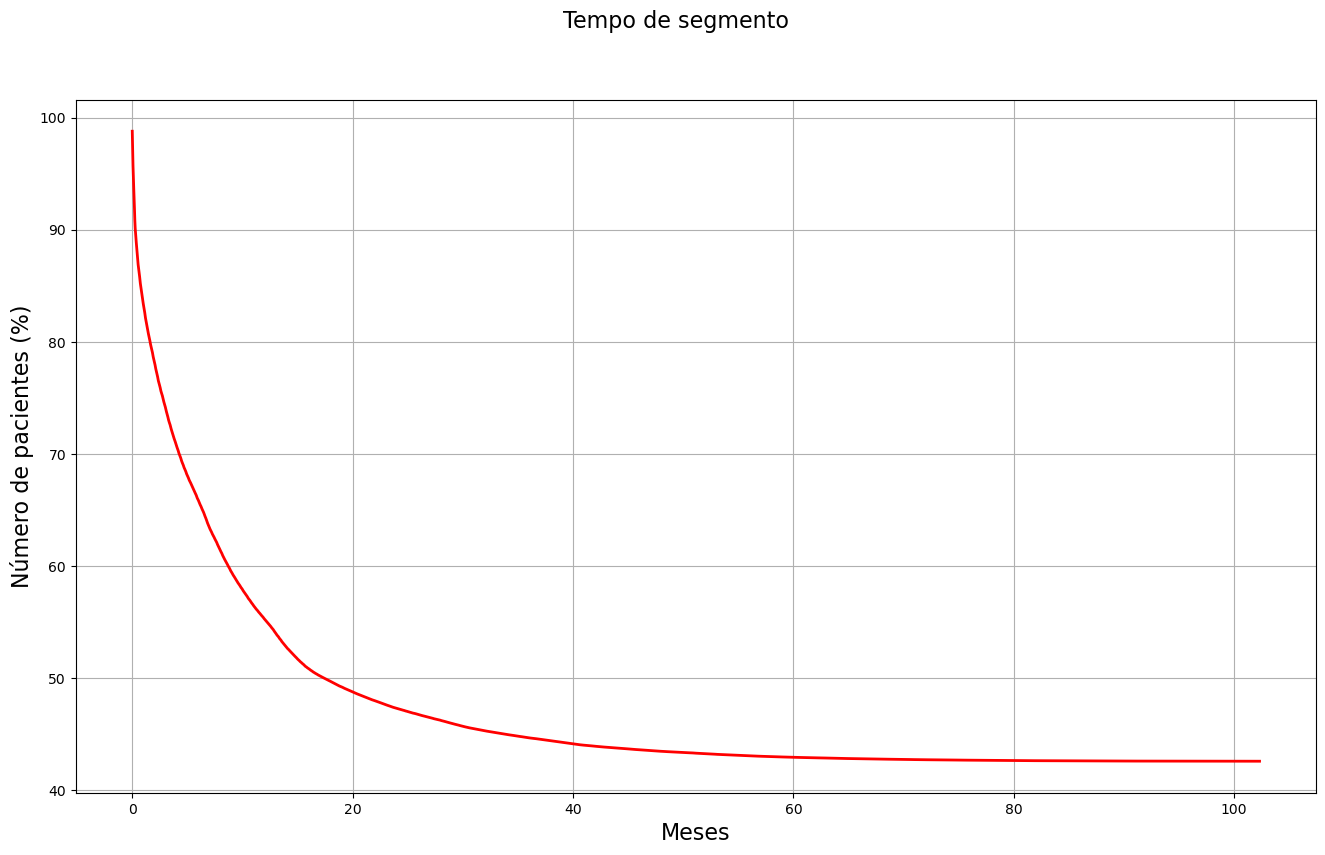

In [50]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Tempo de segmento', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1,1)

ax.set_ylabel('Número de pacientes (%)', fontsize=16)
ax.set_xlabel('Meses', fontsize=16)

ax.plot(unique_delta/30, percentage, 'r', linewidth=2)

ax.grid()

plt.show()

In [35]:
# salvando base de dados
formated_df.to_csv('tempo_de_segmento.csv', index=False,)  

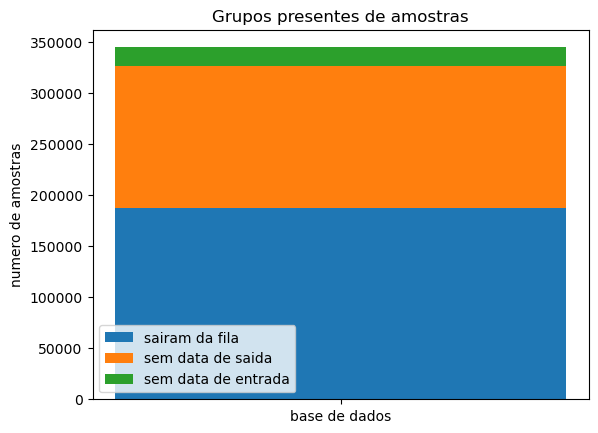

In [49]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ["base de dados"]
y1 = np.array([187253])
y2 = np.array([325667 - 187253])
y3 = np.array([344410 - 325667])

# plot bars in stack manner
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.bar(x, y3, bottom=y1 + y2)

plt.ylabel("numero de amostras")
plt.legend(["sairam da fila", "sem data de saida", "sem data de entrada"])
plt.title("Grupos presentes de amostras")
plt.show()